## import packages

In [95]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(suppress = True)

## define functions

In [71]:
def jaccard_similarity(list1, list2):
    
    s1 = set(list1) # predictions
    s2 = set(list2) # actuals
    
    return float(len(s1.intersection(s2)) / len(s1.union(s2))) 

## import data

In [20]:
val_df = pd.read_csv('val_processed_dummy.csv')

id_pairs = val_df[['id_1','id_2','match']]
X_val = val_df.drop(['match','id_1','id_2','lang_addr_1','lang_addr_2'], axis = 1).copy()
y_val = val_df[['match']].copy()

val_df.head()

,id_1,id_2,match,name_ratio,city_ratio,state_ratio,zip_ratio,country_ratio,url_ratio,categories_ratio,name_ratio_part,city_ratio_part,state_ratio_part,zip_ratio_part,country_ratio_part,url_ratio_part,categories_ratio_part,proximity,same_lang,lang_addr_1,lang_addr_2,len_name_1,len_name_2,len_address_1,len_address_2,len_city_1,len_city_2,len_state_1,len_state_2,len_zip_1,len_zip_2,len_phone_1,len_phone_2
0,E_000008a8ba4f48,E_0a0413f6011f21,False,40,25,100,100,100,100,45,40,50,100,100,100,100,50,6.753999,1,tr,tr,8,12,22,20,3,5,3,3,3,3,0,10
1,E_000008a8ba4f48,E_06f679649b2d43,False,9,100,25,0,100,100,30,15,100,50,0,100,100,20,6.753999,1,tr,tr,8,14,22,14,3,3,3,5,3,5,0,0
2,E_000008a8ba4f48,E_10dd8ec0c80a74,False,18,100,100,100,100,100,15,33,100,100,100,100,100,25,6.753999,0,NaN,NaN,8,3,22,3,3,3,3,3,3,3,0,0
3,E_000008a8ba4f48,E_1057904d524a6d,False,42,25,100,100,100,100,37,43,50,100,100,100,100,56,6.753999,1,tr,tr,8,11,22,22,3,5,3,3,3,3,0,0
4,E_000008a8ba4f48,E_0f8a6af8e936df,False,32,25,0,0,100,100,50,29,50,0,0,100,100,60,6.753999,1,tr,tr,8,11,22,10,3,5,3,6,3,5,0,13


## import model

In [13]:
clf = joblib.load('C:\Users\caseyrya\Documents\foursquare_location_matching\models\xgb_classifier_v1.sav')

C:\Users\caseyrya\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
# function should take the following parameters
    # model
    # data_set
        # processed features and labels for which the model will be evaluated on

# function should return
    # all relevant model scores
        # accuracy
        # precision
        # recall
        # AUC PR
        # Competition specific Jaccard Simulatrity score 

## generate predictions table

In [91]:
# create the predictions table

pos_threshold = 0.3

preds_df = id_pairs.copy()
preds_df['prob_false'] = [i[0] for i in clf.predict_proba(X_val)]
preds_df['prob_true'] = [i[1] for i in clf.predict_proba(X_val)]

preds_df['model_pred'] = np.where(preds_df['prob_true']>=pos_threshold, True, False)

preds_df[preds_df['model_pred']==True].head(10)

,id_1,id_2,match,prob_false,prob_true,model_pred
169,E_000f035c86346d,E_014aa4ee5bd10b,True,0.604385,0.395615,True
552,E_003bce642fe615,E_159b2b6553ca42,True,0.405470,0.594530,True
630,E_004130852b1323,E_0707a99f6352ad,True,0.440861,0.559139,True
631,E_004130852b1323,E_0713a2b8ad024e,True,0.299356,0.700644,True
810,E_0051a9d092d52c,E_0378a1e54671ef,True,0.518848,0.481152,True
894,E_00562aa4e4b2db,E_0258802b17b98e,True,0.211823,0.788177,True
920,E_0058d72cbcb2c4,E_1452af337b6332,True,0.352403,0.647597,True
996,E_0063b4bb86ee6c,E_15ba6d238400c6,True,0.404548,0.595452,True
1020,E_0066a638116247,E_01b5dd82957f95,True,0.588215,0.411785,True
1320,E_0080b3a40c6e13,E_0e97966b5f512b,True,0.467569,0.532431,True


## generate classic metrics

In [92]:
actuals = preds_df['match'].copy()
preds = preds_df['model_pred'].copy()
pos_pred_probs = preds_df['prob_true'].copy()

model_acc = accuracy_score(actuals, preds)
model_prec = precision_score(actuals, preds)
model_rec = recall_score(actuals, preds)
model_f1 = f1_score(actuals, preds)
# model_acc = accuracy_score(actuals, preds)

print(model_acc)
print(model_prec)
print(model_rec)
print(model_f1)

0.9898333333333333
0.9413680781758957
0.3280363223609535
0.4865319865319865


In [96]:
prec, rec, _ = precision_recall_curve(actuals, pos_pred_probs)
model_auc_pr = auc(rec, prec)
print(f'area under the precision-recall curve: {model_auc_pr}')

area under the precision-recall curve: 0.7110496480882075


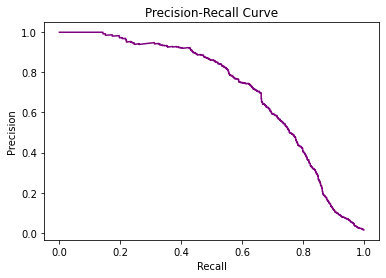

In [37]:
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_model, precision_model, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

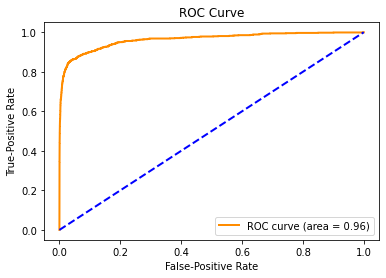

In [52]:
fpr, tpr, _ = roc_curve(actuals,  pos_pred_probs)
model_roc_auc = roc_auc_score(actuals, pos_pred_probs)

fig, ax = plt.subplots()

# ax.plot(fpr,tpr,label="auc="+str(model_roc_auc))

lw = 2
ax.plot(fpr, tpr, color = "darkorange", linewidth = 2, label = "ROC curve (area = %0.2f)" % model_roc_auc)
ax.plot([0, 1], [0, 1], color = "blue", linewidth = 2, linestyle = "--")

ax.set_title('ROC Curve')
ax.set_ylabel('True-Positive Rate')
ax.set_xlabel('False-Positive Rate')

ax.legend(loc=4)
plt.show()

## generate custom (competition specific) metric

In [88]:
# id, matches_actual, matches_predicted, jaccard_score

unique_ids = []
actual_matches = []
predicted_matches = []

for unique_id in preds_df.id_1.drop_duplicates().tolist():
    
    id_actual_matches = []
    id_predicted_matches = []
    
    id_df = preds_df[preds_df['id_1']==unique_id].copy()
    
    for row in range(0, len(id_df)):
        
        if id_df['match'][row:row+1].values[0] == True:
            id_actual_matches.append(id_df['id_2'][row:row+1].values[0])
        else:
            pass
        
        if id_df['model_pred'][row:row+1].values[0] == True:
            id_predicted_matches.append(id_df['id_2'][row:row+1].values[0])
        else:
            pass
        
    id_actual_matches.append(unique_id)
    id_predicted_matches.append(unique_id)
        
    unique_ids.append(unique_id)
    actual_matches.append(id_actual_matches)
    predicted_matches.append(id_predicted_matches)
    

comp_metric_df = pd.DataFrame({'id': unique_ids,
                               'actual_matches': actual_matches,
                               'predicted_matches': predicted_matches})

comp_metric_df['jaccard_score'] = [round(jaccard_similarity(comp_metric_df['predicted_matches'].tolist()[i], comp_metric_df['actual_matches'].tolist()[i]),3) for i in range(0, len(comp_metric_df))]

# final score
final_score = round(comp_metric_df.jaccard_score.mean(), 3)
print(final_score)

comp_metric_df[0:10]

0.974


,id,actual_matches,predicted_matches,jaccard_score
0,E_000008a8ba4f48,[E_000008a8ba4f48],[E_000008a8ba4f48],1.0
1,E_00001d92066153,[E_00001d92066153],[E_00001d92066153],1.0
2,E_00002a131a2bf6,[E_00002a131a2bf6],[E_00002a131a2bf6],1.0
3,E_0001827d6b4ee2,[E_0001827d6b4ee2],[E_0001827d6b4ee2],1.0
4,E_0001a397f67ad5,[E_0001a397f67ad5],[E_0001a397f67ad5],1.0
5,E_000260dd24cecf,[E_000260dd24cecf],[E_000260dd24cecf],1.0
6,E_000288f2046ce3,[E_000288f2046ce3],[E_000288f2046ce3],1.0
7,E_0002baf74f8aa3,[E_0002baf74f8aa3],[E_0002baf74f8aa3],1.0
8,E_0003e423fa55aa,[E_0003e423fa55aa],[E_0003e423fa55aa],1.0
9,E_000411fceef43c,[E_000411fceef43c],[E_000411fceef43c],1.0


## feature importances

In [83]:
# calculate the feature importances
feature_importance_df = pd.DataFrame(zip(X_val.columns,
                                         clf.feature_importances_),
                                     columns=['feature',
                                              'feature_importance'])

feature_importance_df.sort_values('feature_importance', ascending = False)

,feature,feature_importance
7,name_ratio_part,0.334455
0,name_ratio,0.163297
6,categories_ratio,0.063329
13,categories_ratio_part,0.061516
16,len_name_1,0.055289
17,len_name_2,0.053563
19,len_address_2,0.038895
18,len_address_1,0.037529
1,city_ratio,0.031465
20,len_city_1,0.026084
